<img src=https://www.icesi.edu.co/wp-content/uploads/2024/08/financiacion-universidad-icesi.png width="450" height="200" align="center">

#**<big><big><i>Clusterizacion de perfiles de usuarios bancarios</i>**

# **<big>Clusterizacion de los datos</big>**

<big><big>**Integrantes**</big></big>
* Juan Jose Diaz
* Mateo Silva

---

## Clusterización

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer

In [ ]:
df = pd.read_parquet('Datos_ASOC_CMV_clean.parquet')

In [ ]:
id_unico = df['IdUnico']

In [ ]:
columns_to_drop = [
    'IdUnico', 'Personas_a_Cargo_Menores_18', 'PAP', 'Pila', 'bancaseguro', 'AFC',
    'TieneVISA', 'Credisolidario', 'Solidaridad',
    'Exequial', 'Herencia', 'Hospitalizacion', 'Recuperacion', 'Tranquilidad', 'Vida',
    'VidaClasica', 'HogarMasyTotalHome', 'OtrasPolizas', 'MI', 'CEM', 'SAOR', 'MPT', 'numedad', 'PlanEducativo',
    'Credimutual', 'SolidaridadPBI', 'Libranza', 'ReestructuracionConsumo', 'COERotativo', 'Originadores', 'COE', 'CupoEducar', 'CreditoTurismo',
    'CreditoSaludBienestar', 'ReestructuracionComercial', 'ReestructuracionVivienda', 'Findeter', 'Bancoldex', 'Sobregiro', 'FindeterRotativo', 'NominaFacil', 'Desempleo',
    'FondoSocialViviendaPatrimonial', 'FondoSocialViviendaBanco', 'PrimaNivelada', 'FIC_365',
    'FIC_90', 'FIC_Vista', 'Inversiones_No_Tradicionales',

    'log_ingresos',
    'log_ingresos_deflactados',

    # Nuevas eliminaciones
    "Inversiones_No_Tradicionales",
    "Renta_Fija_Corto_Plazo",
    "CuentaPension",
    "FondoSocialViviendaVida",
    "PagodeObligaciones",
    "CreditoProductivo",
    "CreditoCalamidad",
    "CreditoCapitaldeTrabajo",
    "Microcreditos",
    "CuotaManejo",
    "Cred_Otros",
    "Cred_Creac_Empr",
    "Cred_Lib_Inv_con_Garant",


    'Ingresos_Deflactados'

]

df = df.drop(columns=columns_to_drop)

In [ ]:
df_numericas = df.select_dtypes(include=['int64', 'float64'])

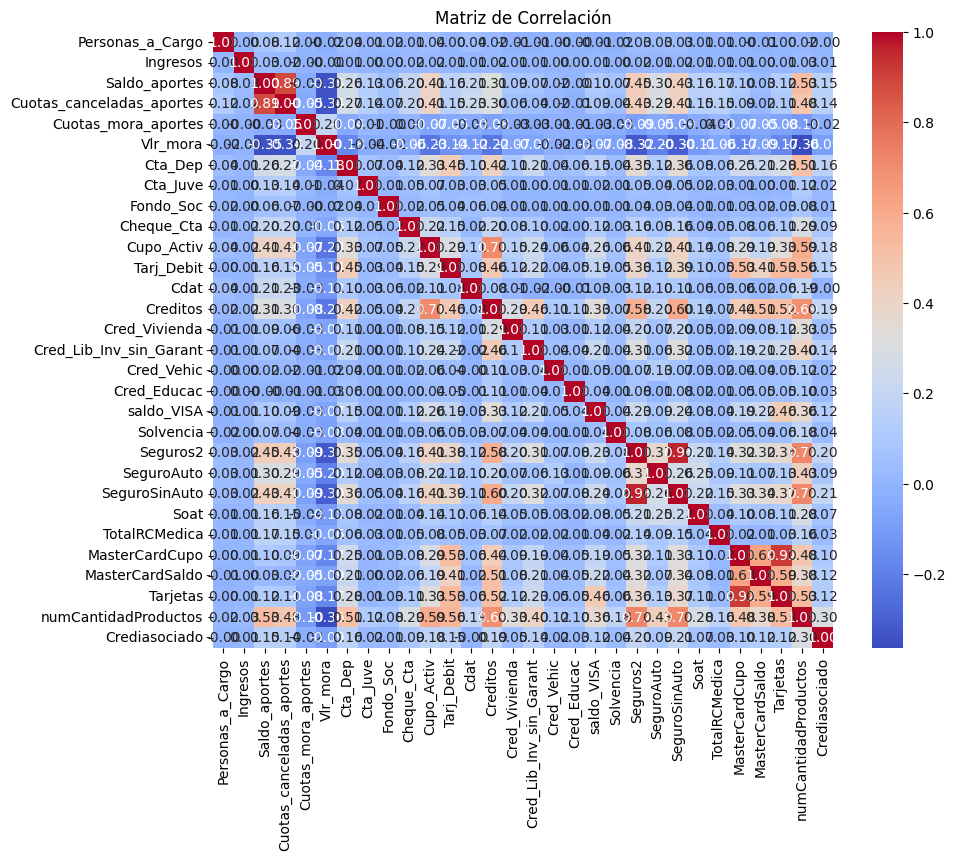

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df_numericas.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


In [ ]:
pd.set_option('display.max_rows', 150)
df.isna().sum()

,0
Fecha_Ingreso,0
Nombre_Estado,0
Nombre_Tipo_Vinculacion,0
Estado_Civil,0
Personas_a_Cargo,0
Sexo,0
Estrato,0
Nombre_Tipo_Vivienda,0
Nombre_Nivel_Academico,0
Fecha_Nacimiento,0


### Preparacion de datos y Encontrar clusters

## **Convertir la fecha en variable numérica útil**

In [ ]:
import pandas as pd
from datetime import datetime

# Asegúrate de que esté en formato datetime
df['Fecha_Ingreso'] = pd.to_datetime(df['Fecha_Ingreso'], format='%m/%d/%Y')
df['Fecha_Nacimiento'] = pd.to_datetime(df['Fecha_Nacimiento'], format='%m/%d/%Y')

# Calcular antigüedad en días
df['Antiguedad_dias'] = (pd.Timestamp.today() - df['Fecha_Ingreso']).dt.days

# Calcular la edad en años
today = pd.Timestamp.today()
df['Edad'] = df['Fecha_Nacimiento'].apply(lambda fecha: today.year - fecha.year - ((today.month, today.day) < (fecha.month, fecha.day)))

In [ ]:
df.drop(columns=['Fecha_Ingreso', 'Fecha_Nacimiento'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203423 entries, 0 to 237722
Data columns (total 42 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Nombre_Estado              203423 non-null  object 
 1   Nombre_Tipo_Vinculacion    203423 non-null  object 
 2   Estado_Civil               203423 non-null  object 
 3   Personas_a_Cargo           203423 non-null  int64  
 4   Sexo                       203423 non-null  object 
 5   Estrato                    203423 non-null  object 
 6   Nombre_Tipo_Vivienda       203423 non-null  object 
 7   Nombre_Nivel_Academico     203423 non-null  object 
 8   Ingresos                   203423 non-null  float64
 9   Nombre_Titulo_Obtenido     203423 non-null  object 
 10  Nombre_Ocupacion           203423 non-null  object 
 11  Saldo_aportes              203423 non-null  float64
 12  Cuotas_canceladas_aportes  203423 non-null  float64
 13  Cuotas_mora_aportes        203423 

In [ ]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [ ]:
cat_cols

['Nombre_Estado',
 'Nombre_Tipo_Vinculacion',
 'Estado_Civil',
 'Sexo',
 'Estrato',
 'Nombre_Tipo_Vivienda',
 'Nombre_Nivel_Academico',
 'Nombre_Titulo_Obtenido',
 'Nombre_Ocupacion',
 'Zona']

In [ ]:
### Delete Nombre_Titulo_Obtenido of cat_cols
cat_cols.remove('Nombre_Titulo_Obtenido')
cat_cols.remove('Zona')

In [ ]:
def agrupar_titulo(titulo):
    titulo = str(titulo).lower()

    if "enfermer" in titulo or "quirúrgica" in titulo or "medicina" in titulo:
        return "Salud"
    elif "sistem" in titulo or "analisis" in titulo or "tecnolog" in titulo:
        return "Tecnología"
    elif "admin" in titulo or "negocios" in titulo or "gestion" in titulo:
        return "Administración"
    elif "derecho" in titulo or "relaciones internacionales" in titulo or "ciencias sociales" in titulo:
        return "Ciencias Sociales"
    elif "docente" in titulo or "lic." in titulo:
        return "Educación"
    elif "ingenier" in titulo:
        return "Ingeniería"
    elif "comunicacion" in titulo or "periodismo" in titulo:
        return "Comunicaciones"
    elif "arquitectura" in titulo:
        return "Arquitectura"
    else:
        return "Otro"


In [ ]:
df['Area_Titulo'] = df['Nombre_Titulo_Obtenido'].apply(agrupar_titulo)

In [ ]:
df_dummies_titulo = pd.get_dummies(df['Area_Titulo'], drop_first=True)

In [ ]:
df_dummies = pd.get_dummies(df[cat_cols], drop_first=True)

In [ ]:
region_map = {
    # Región Andina
    "Bogotá": "Andina",
    "Medellín": "Andina",
    "Manizales": "Andina",
    "Pereira": "Andina",
    "Ibagué": "Andina",
    "Tunja": "Andina",
    "Armenia": "Andina",
    "Neiva": "Andina",
    "Bucaramanga": "Andina",
    "Cúcuta": "Andina",
    "Popayán": "Andina",
    "Pasto": "Andina",
    "Chía": "Andina",
    "Zipaquirá": "Andina",
    "Soacha": "Andina",
    "Floridablanca": "Andina",
    "Girón": "Andina",
    "Dosquebradas": "Andina",

    # Región Caribe
    "Barranquilla": "Caribe",
    "Cartagena": "Caribe",
    "Santa Marta": "Caribe",
    "Montería": "Caribe",
    "Sincelejo": "Caribe",
    "Valledupar": "Caribe",
    "Riohacha": "Caribe",
    "Ciénaga": "Caribe",
    "Soledad": "Caribe",
    "Malambo": "Caribe",
    "Sabanalarga": "Caribe",
    "Turbaco": "Caribe",
    "Magangué": "Caribe",
    "Lorica": "Caribe",
    "Plato": "Caribe",
    "Cereté": "Caribe",

    # Región Pacífica
    "Cali": "Pacífica",
    "Buenaventura": "Pacífica",
    "Quibdó": "Pacífica",
    "Tumaco": "Pacífica",
    "Guapi": "Pacífica",
    "Timbiquí": "Pacífica",
    "Istmina": "Pacífica",
    "San Andrés de Tumaco": "Pacífica",

    # Región Orinoquía
    "Villavicencio": "Orinoquía",
    "Yopal": "Orinoquía",
    "Arauca": "Orinoquía",
    "Puerto Carreño": "Orinoquía",
    "Tame": "Orinoquía",
    "Paz de Ariporo": "Orinoquía",
    "Saravena": "Orinoquía",

    # Región Amazonía
    "Leticia": "Amazonía",
    "Florencia": "Amazonía",
    "Mocoa": "Amazonía",
    "San José del Guaviare": "Amazonía",
    "Mitú": "Amazonía",
    "Inírida": "Amazonía",
    "Puerto Asís": "Amazonía",
    "La Chorrera": "Amazonía",
}


In [ ]:
def mapear_region(zona):
    zona = zona.strip().title()
    return region_map.get(zona, "Otro")

In [ ]:
df['Region'] = df['Zona'].apply(mapear_region)

In [ ]:
df_dummies_region = pd.get_dummies(df['Region'], drop_first=True)

In [ ]:
column_to_drop = [
    'Nombre_Titulo_Obtenido',
    'Zona'
]

df = df.drop(columns=column_to_drop)

In [ ]:
df.drop(columns=cat_cols, inplace=True)

In [ ]:
df = pd.concat([df, df_dummies, df_dummies_region, df_dummies_titulo], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203423 entries, 0 to 237722
Data columns (total 99 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   Personas_a_Cargo                                     203423 non-null  int64  
 1   Ingresos                                             203423 non-null  float64
 2   Saldo_aportes                                        203423 non-null  float64
 3   Cuotas_canceladas_aportes                            203423 non-null  float64
 4   Cuotas_mora_aportes                                  203423 non-null  float64
 5   Vlr_mora                                             203423 non-null  float64
 6   Cta_Dep                                              203423 non-null  float64
 7   Cta_Juve                                             203423 non-null  float64
 8   Fondo_Soc                                            203423

In [ ]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
cat_cols

['Area_Titulo', 'Region']

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols

['Personas_a_Cargo',
 'Ingresos',
 'Saldo_aportes',
 'Cuotas_canceladas_aportes',
 'Cuotas_mora_aportes',
 'Vlr_mora',
 'Cta_Dep',
 'Cta_Juve',
 'Fondo_Soc',
 'Cheque_Cta',
 'Cupo_Activ',
 'Tarj_Debit',
 'Cdat',
 'Creditos',
 'Cred_Vivienda',
 'Cred_Lib_Inv_sin_Garant',
 'Cred_Vehic',
 'Cred_Educac',
 'saldo_VISA',
 'Solvencia',
 'Seguros2',
 'SeguroAuto',
 'SeguroSinAuto',
 'Soat',
 'TotalRCMedica',
 'MasterCardCupo',
 'MasterCardSaldo',
 'Tarjetas',
 'numCantidadProductos',
 'Crediasociado',
 'Antiguedad_dias',
 'Edad']

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

scaler.fit(df[numeric_cols])

scaled_data_zscaled = scaler.transform(df[numeric_cols])
scaled_data_zscaled = pd.DataFrame(scaled_data_zscaled, columns=numeric_cols)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df[numeric_cols])

scaled_data_minmax = scaler.transform(df[numeric_cols])
scaled_data_minmax = pd.DataFrame(scaled_data_zscaled, columns=numeric_cols)

##Clusterización utilizando sólo KMeans (no es la propuesta final, ver más abajo)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import hdbscan
import seaborn as sns

# 2️⃣ Escalado
# ------------------------------------------
# Quitar filas con valores faltantes
X = df.select_dtypes(include=["float64", "int64"])
scaler = StandardScaler()
X = X.dropna()
X_scaled = scaler.fit_transform(X)


/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


In [ ]:
# 3️⃣ Reducción de dimensionalidad (PCA)
# ------------------------------------------
pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# 4️⃣ Prueba con varios K para KMeans
# ------------------------------------------
silhouette_scores = []
db_scores = []
k_values = range(3, 12)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    silhouette = silhouette_score(X_pca, labels)
    db = davies_bouldin_score(X_pca, labels)
    silhouette_scores.append(silhouette)
    db_scores.append(db)

In [ ]:
# 6️⃣ Seleccionar el mejor K y reentrenar
# ------------------------------------------
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"🔹 Mejor número de clusters según Silhouette: {best_k}")

kmeans_best = KMeans(n_clusters=best_k, random_state=42)
labels_best = kmeans_best.fit_predict(X_pca)

In [ ]:
# 7️⃣ Visualización 2D con PCA
# ------------------------------------------
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_2d[:,0], y=X_pca_2d[:,1],
                hue=labels_best, palette="tab10", s=40)
plt.title(f"Clusterización Óptima (K={best_k})")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Aunque el Silhouette Score nos diga que K=4 es “óptimo”, eso no siempre significa que sea el más útil para nuestro objetivo. KMeans (4 clusters) crea regiones rígidas (fronteras lineales), por eso se ven “bloques limpios” pero poco flexibles. Si intentamos subir K sin ajustar la estructura de los datos, se pierde separación.

###**Enfoque UMAP + KMeans**


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


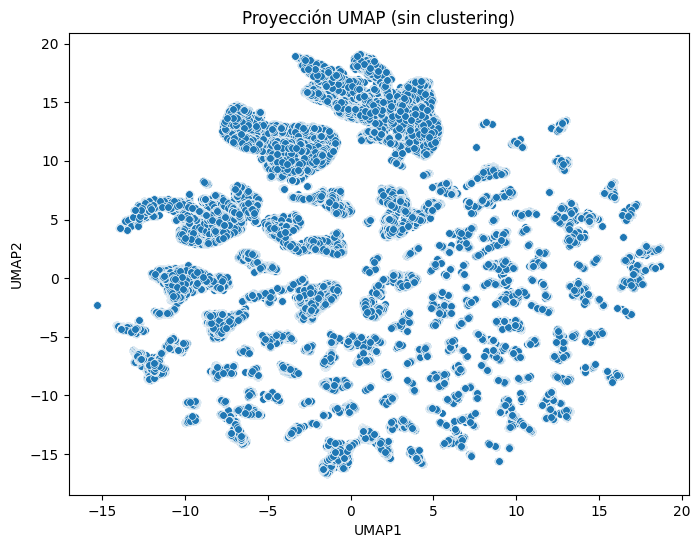

In [ ]:
# Reducción de dimensionalidad no lineal con UMAP
reducer = umap.UMAP(
    n_neighbors=30,
    min_dist=0.1,
    n_components=2,
    random_state=42
)

X_umap = reducer.fit_transform(X_scaled)


# Visualización base (sin clustering)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], s=30)
plt.title("Proyección UMAP (sin clustering)")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.show()

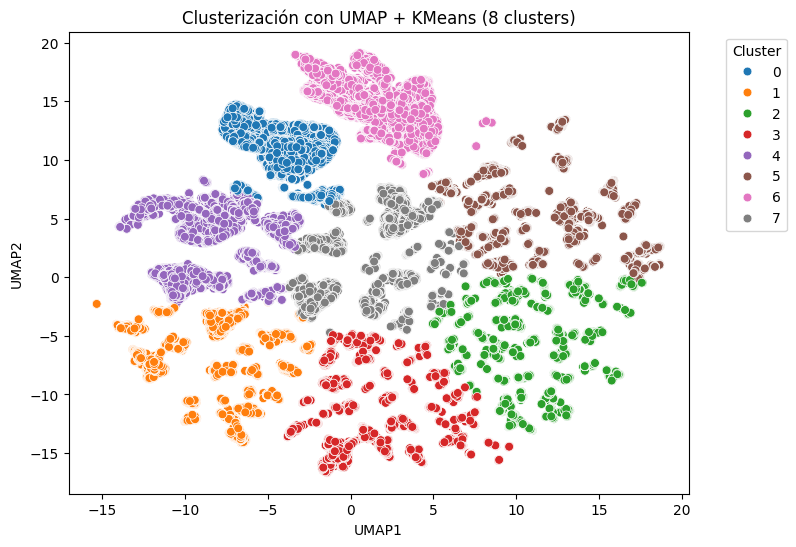

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=42)
labels_kmeans = kmeans.fit_predict(X_umap)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1],
                hue=labels_kmeans, palette="tab10", s=40)
plt.title("Clusterización con UMAP + KMeans (8 clusters)")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Aplicamos un proceso de reducción de dimensionalidad con UMAP previo a la clusterización mediante K-Means.
El uso de UMAP permitió preservar estructuras no lineales y reducir la complejidad del espacio original, facilitando que K-Means identificara grupos más coherentes y bien definidos.

Inicialmente se probó HDBSCAN sobre UMAP, pero este generaba un número muy elevado de clusters (más de 200) y ruido significativo.
Por ello, se optó por K-Means sobre la proyección UMAP, logrando una segmentación más estable, interpretable y equilibrada (≈8 clusters) con un Silhouette Score de 0.406, lo que indica una separación razonable entre los grupos.

###**Pruebas**

In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_umap, labels_kmeans)
print(f"Silhouette Score: {sil_score:.3f}")


Un Silhouette Score de $0.406$ indica que la clusterización es moderadamente buena. En contextos reales, valores entre $0.35$ y $0.5$ son aceptables y útiles, ya que los datos suelen tener solapamientos naturales.

In [ ]:
pd.Series(labels_kmeans).value_counts().sort_index()


,count
0,23140
1,21221
2,26977
3,25163
4,27828
5,23852
6,25803
7,29439


No tenemos clusters extremadamente pequeños ni uno que domine todo el dataset (lo que suele pasar en HDBSCAN mal ajustado o en KMeans con datos desbalanceados).

In [ ]:
df_clean = df.dropna(subset=X.columns).copy()
df_clean['Cluster'] = labels_kmeans

In [ ]:
cluster_profiles = df_clean.groupby(['Cluster']).agg(
    personas_a_cargo=('Personas_a_Cargo', 'mean'),
    Ingresos=('Ingresos', 'mean'),
    Edad=('Edad', 'mean'),
    saldo_aportes=('Saldo_aportes', 'mean'),
    cuotas_canceladas_aportes=('Cuotas_canceladas_aportes', 'mean'),
    cuotas_mora_aportes=('Cuotas_mora_aportes', 'mean'),
    valor_mora=('Vlr_mora', 'mean'),
    estrato_2=('Estrato_2', 'mean'),
    estrato_3=('Estrato_3', 'mean'),
    estrato_4=('Estrato_4', 'mean'),
    estrato_5=('Estrato_5', 'mean'),
    estrato_6=('Estrato_6', 'mean'),
    estrato_9=('Estrato_9', 'mean')
)

In [ ]:
cluster_profiles_rounded = cluster_profiles.round(2)
cluster_profiles_rounded

cluster_profiles_rounded.to_csv('cluster_profiles_umap_kmeans.csv', index=True)

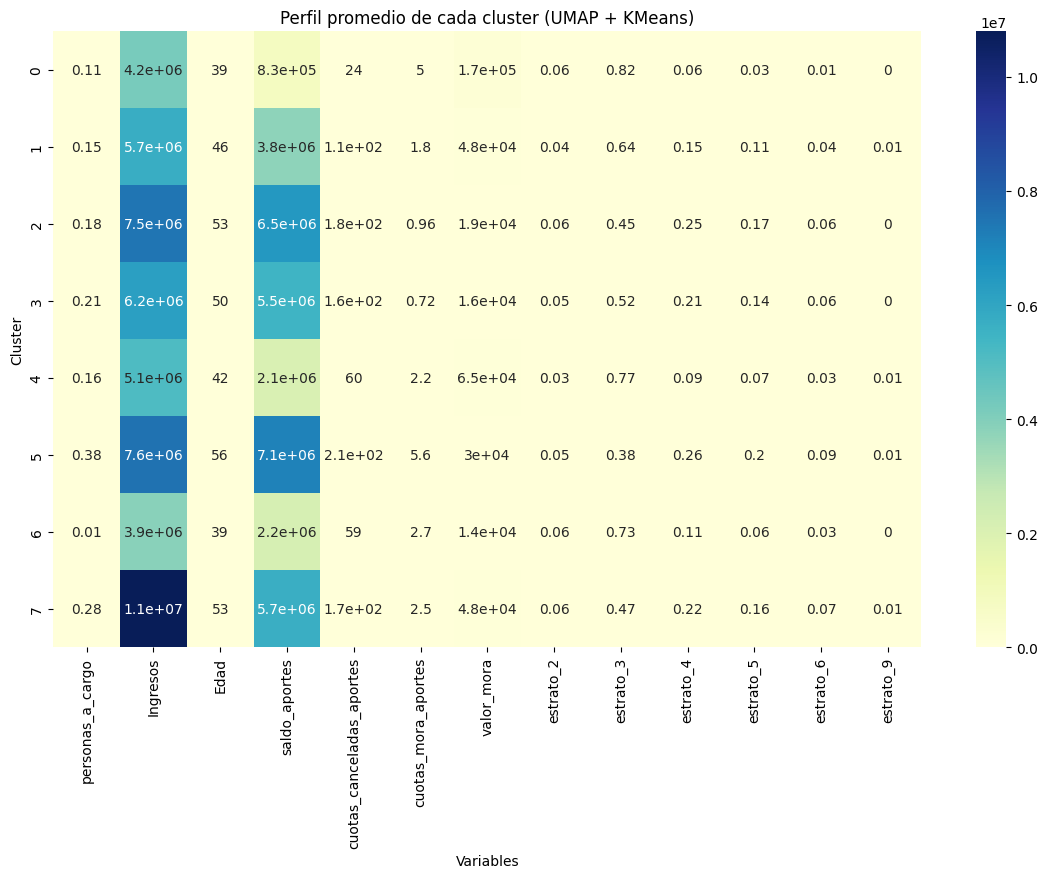

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(cluster_profiles.round(2), annot=True, cmap='YlGnBu')
plt.title('Perfil promedio de cada cluster (UMAP + KMeans)')
plt.xlabel('Variables')
plt.ylabel('Cluster')
plt.show()

In [ ]:
df_clean['IdUnico'] = id_unico.reset_index(drop=True)
df_original = pd.read_parquet('Datos_ASOC_CMV_clean.parquet')

df_combinado = pd.merge(df_original, df_clean, on='IdUnico', how='inner')
df_combinado = df_combinado.loc[:, ~df_combinado.columns.str.endswith('_y')]
df_combinado.columns = df_combinado.columns.str.replace('_x', '', regex=False)

df_combinado.head()

,IdUnico,Fecha_Ingreso,Nombre_Estado,Nombre_Tipo_Vinculacion,Estado_Civil,Personas_a_Cargo,Personas_a_Cargo_Menores_18,Sexo,Estrato,Nombre_Tipo_Vivienda,...,Pacífica,Arquitectura,Ciencias Sociales,Comunicaciones,Educación,Ingeniería,Otro,Salud,Tecnología,Cluster
0,1,10/31/2023,Inactivo,Técnicos y Tecnólogos,Soltero,0,0,M,3,Familiar,...,False,False,False,False,False,False,True,False,False,0
1,2,7/29/2024,Activo Normal,Profesional,Soltero,0,0,F,3,Familiar,...,True,False,False,False,False,False,True,False,False,1
2,3,3/20/2025,Activo Cobranza Interna,Estudiante,Soltero,0,0,F,3,Familiar,...,False,False,False,True,False,False,False,False,False,4
3,4,3/14/2024,Activo Normal,Técnicos y Tecnólogos,Soltero,0,0,M,3,Familiar,...,False,False,False,False,False,False,False,False,False,5
4,5,10/19/2021,Inactivo,Técnicos y Tecnólogos,Soltero,0,2,F,3,Familiar,...,False,False,False,False,False,False,False,False,False,0


In [ ]:
df_combinado.head(3).to_excel('Datos_ASOC_CMV_final_umap_kmeans_first_3.xlsx', index=False)

In [ ]:
import pickle

# Guardar los modelos entrenados
# Using pickle to save the models, excluding compiled functions
with open("umap_model.pkl", "wb") as f:
    pickle.dump(reducer, f)
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)
with open("scaler_model.pkl", "wb") as f:
    pickle.dump(scaler, f)


print("✅ Modelos guardados correctamente en archivos .pkl")

✅ Modelos guardados correctamente en archivos .pkl


In [ ]:
# Después de hacer todo el preprocesamiento (dummies, región, etc.)
print(f"Total de columnas después del preprocesamiento: {df.shape[1]}")
print(f"\nTipos de datos:")
print(df.dtypes.value_counts())
print(f"\nColumnas numéricas (float64/int64):")
X = df.select_dtypes(include=["float64", "int64"])
print(f"Total: {X.shape[1]}")
print(f"\nColumnas que NO son float64/int64:")
non_numeric = df.select_dtypes(exclude=["float64", "int64"])
print(f"Total: {non_numeric.shape[1]}")
print(f"Nombres: {list(non_numeric.columns)}")

Total de columnas después del preprocesamiento: 99

Tipos de datos:
bool       65
float64    29
int64       3
object      2
Name: count, dtype: int64

Columnas numéricas (float64/int64):
Total: 32

Columnas que NO son float64/int64:
Total: 67
Nombres: ['Area_Titulo', 'Region', 'Nombre_Estado_Activo Normal', 'Nombre_Estado_Inactivo', 'Nombre_Estado_Receso', 'Nombre_Estado_Suspendido Cobranza Interna', 'Nombre_Estado_Suspendido Fallecido', 'Nombre_Estado_Suspendido Normal', 'Nombre_Tipo_Vinculacion_Empleado No Profesional', 'Nombre_Tipo_Vinculacion_Empresa Persona Natural', 'Nombre_Tipo_Vinculacion_Estudiante', 'Nombre_Tipo_Vinculacion_Familiar Asociado', 'Nombre_Tipo_Vinculacion_Familiar Asociado Fallecido', 'Nombre_Tipo_Vinculacion_Mayor 60', 'Nombre_Tipo_Vinculacion_Personas Jurídicas', 'Nombre_Tipo_Vinculacion_Profesional', 'Nombre_Tipo_Vinculacion_Recién Graduado', 'Nombre_Tipo_Vinculacion_Transición', 'Nombre_Tipo_Vinculacion_Técnicos y Tecnólogos', 'Estado_Civil_Divorciado', 'Esta

In [ ]:
import umap
import dill  # ← Cambiado de pickle a dill
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Si no tienes dill instalado en Colab:
# !pip install dill

# -------------------------------------------------------
# 1️⃣ Escalar los datos
# -------------------------------------------------------
X = df.select_dtypes(include=["float64", "int64"]).dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------------------------------
# 2️⃣ Reducir con UMAP
# -------------------------------------------------------
reducer = umap.UMAP(
    n_neighbors=30,
    min_dist=0.1,
    n_components=2,
    random_state=42,
    transform_seed=42,
    low_memory=True
)
X_umap = reducer.fit_transform(X_scaled)

# -------------------------------------------------------
# 3️⃣ Clustering con KMeans
# -------------------------------------------------------
kmeans = KMeans(n_clusters=8, random_state=42)
labels_kmeans = kmeans.fit_predict(X_umap)

# -------------------------------------------------------
# 4️⃣ Guardar modelos
# -------------------------------------------------------
# Guardar UMAP completo con dill (maneja mejor objetos complejos)
with open('umap_model.pkl', 'wb') as f:
    dill.dump(reducer, f)

# Guardar scaler y KMeans con pickle normal
with open("scaler_model.pkl", "wb") as f:
    pickle.dump(scaler, f, protocol=4)

with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f, protocol=4)

print("✅ Modelos guardados correctamente:")
print("- umap_model.pkl (con dill)")
print("- kmeans_model.pkl")
print("- scaler_model.pkl")

# -------------------------------------------------------
# 5️⃣ Descargar archivos de Colab
# -------------------------------------------------------
from google.colab import files

files.download('umap_model.pkl')
files.download('kmeans_model.pkl')
files.download('scaler_model.pkl')

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


✅ Modelos guardados correctamente:
- umap_model.pkl (con dill)
- kmeans_model.pkl
- scaler_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ============================================
# NUEVO: Guardar modelos para Lambda
# ============================================
import pickle
from sklearn.neighbors import NearestNeighbors
from pathlib import Path

# Crear carpeta
Path('models').mkdir(exist_ok=True)

# 1. Guardar Scaler
with open('models/scaler_model.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✓ Scaler guardado")

# 2. Guardar KMeans
with open('models/kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)
print("✓ KMeans guardado")

# 3. Crear y guardar índice KNN (NUEVO)
knn = NearestNeighbors(n_neighbors=15, metric='euclidean')
knn.fit(X_scaled)
print("✓ KNN index creado")

# 4. Guardar embeddings UMAP + KNN
umap_data = {
    'embeddings': X_umap,
    'knn_index': knn,
    'feature_names': list(X.columns)
}
with open('models/umap_data.pkl', 'wb') as f:
    pickle.dump(umap_data, f)
print("✓ Datos UMAP guardados")

print("\n✅ Modelos listos para Lambda!")
print("Descarga la carpeta 'models/' desde Colab")

✓ Scaler guardado
✓ KMeans guardado
✓ KNN index creado
✓ Datos UMAP guardados

✅ Modelos listos para Lambda!
Descarga la carpeta 'models/' desde Colab
